### 4_SVM_PolynomialFeatures_RBFKernel_GammaValue

In [95]:
#  Copyright private in 2018 
#  Modify Date: 
#      2018-9-19
#  Purpose : 
#      SVM learning - 多项式 分类 / RBF Kernel SVM  (gamma = 100/10/1/0.1)
#      # RBF Kernel 升维 
#      # gamma 值越大 - overfitting
#      # gamma 值越小 - underfitting
# ----------
#coding:utf-8
# import model or lib
import numpy as np
import matplotlib.pyplot as plt
from  sklearn import datasets


In [172]:
# Data prepartion - make moons  
X,y = datasets.make_moons(noise = 0.20,random_state = 100)
X.shape  # 100*2 
y.shape  # 100 

(100,)

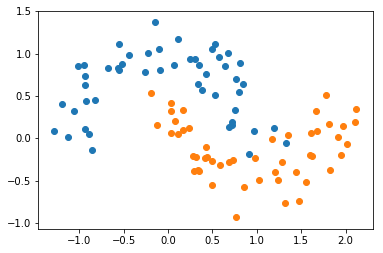

In [45]:
# plot the data - 半月形数据
plt.scatter(X[y == 0,0], X[y == 0,1])
plt.scatter(X[y == 1,0], X[y == 1,1])
plt.show()

### 1. 使用多项式特征的SVM

In [55]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline   # 顺序执行多个操作

# define the PolynomialFeaturesSVM
def PolynomialFeaturesSVM(degree,C =1.0):  # 多项式degree 
    return Pipeline([
        ("poly",PolynomialFeatures(degree = degree)),
        ("std_scaler",StandardScaler()),
        ("LinearSVC",LinearSVC(C=C))
        ])



In [52]:
# fit the data 
# degree and C 正则化项 min(w**2) + C* sum(eta)
# L1 or L2 正则化项
Poly_SVC = PolynomialFeaturesSVM(degree = 3,C=2)
Poly_SVC.fit(X,y)

Pipeline(memory=None,
     steps=[('poly1', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LinearSVC', LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [179]:
# 3 plot the decision boundary
def plot_decision_bounary(model, axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1], int( (axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3], int( (axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    x_new          =   np.c_[x0.ravel(), x1.ravel()]
    y_prediction   =   model.predict(x_new)
    y_prediction   =   y_prediction.reshape(x0.shape)
    
    
    from matplotlib.colors import ListedColormap
    custom_map  = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0,x1,y_prediction, cmap = custom_map)
    

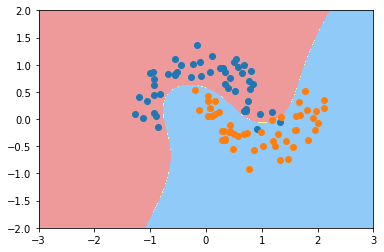

In [180]:
# plot the figure 
plot_decision_bounary(Poly_SVC,axis = [-3, 3, -2 , 2])
plt.scatter(X[y == 0,0], X[y == 0,1])
plt.scatter(X[y == 1,0], X[y == 1,1])
plt.show()

### 2. 使用多项式Kernel的SVM

In [73]:
# 
from sklearn.svm import SVC # LinearSVC is for LinearSVM 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [93]:
# define PolynomialKernelSVM - 非线性决策边界 
def PolynomialKernelSVM(degree,C = 1):
    return Pipeline([
            ("std_sca",StandardScaler()),
            ("PolyKernelSVM",SVC(kernel = 'poly', degree = degree, C  = C))  # 多项式kernel 
            ])

In [90]:
PolKernelSVM = PolynomialKernelSVM(degree=3,C = 0.2)
PolKernelSVM.fit(X,y)

Pipeline(memory=None,
     steps=[('std_sca', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PolyKernelSVM', SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [ ]:
### Other model .... 

In [87]:
PolKernelSVM10 = PolynomialKernelSVM(degree=5,C=2)
PolKernelSVM10.fit(X,y)

Pipeline(memory=None,
     steps=[('std_sca', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PolyKernelSVM', SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

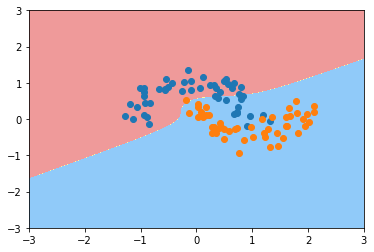

In [181]:
# plot the figure 
plot_decision_bounary(PolKernelSVM,axis = [-3,3,-3,3])
plt.scatter(X[y == 0,0], X[y == 0,1])
plt.scatter(X[y == 1,0], X[y == 1,1])
plt.show()

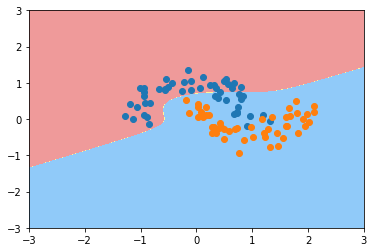

In [182]:
# plot the figure 
plot_decision_bounary(PolKernelSVM10,axis = [-3,3,-3,3])
plt.scatter(X[y == 0,0], X[y == 0,1])
plt.scatter(X[y == 1,0], X[y == 1,1])
plt.show()


### 3. 使高斯核Kernel的SVM - RBF Kernel

In [ ]:
# 理论上RBF kernel 将数据点拓展到无限维度的特征空间上
# 升维是一维不可分的函数升到多维空间，编程高斯可分的
# 

In [96]:
# 以下shown 一维度数据点升维到多维的过程
# l1, l2 - 作为地标

In [98]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
data_x = np.arange(-4,8,1)

In [101]:
data_x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

In [103]:
data_y  = np.array( (data_x>= -4)&(data_x <= 3), dtype = 'int')

In [104]:
data_y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

### 一维数据显然是线性不可分的

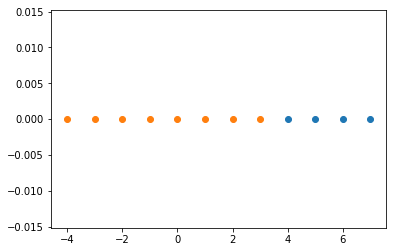

In [112]:
#plot 一维数据显然是线性不可分的
# data_y = 0 or data_y = 1
plt.scatter(data_x[data_y == 0],0*data_x[data_y == 0])
plt.scatter(data_x[data_y == 1],0*data_x[data_y == 1])
plt.show()

### 3.1 RBF Kernel Function

In [154]:
# RBF Functions 
# K(x,y) = exp(-gamma*(x-y)**2)
# 将 m*n 的数据映射成m *m 的数据，计算开销比较大 ，多应用于NLP 
#
def RBFKernel(gamma,x,y):
    return np.exp(-gamma* (x-y)**2)

In [152]:
# land mark
L1 = -4
L2 = 4

In [195]:
#for index, data in enumerate(data_x):
 #   print(index)

In [196]:
#for index, data in enumerate(data_x):
 #   print(data)

###  将一维不可分数据升维为 2 维数据

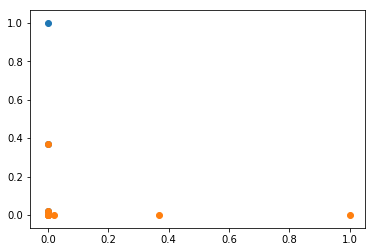

In [153]:
X  = np.empty((len(data_x),2))
for index, data in enumerate(data_x):
    X[index,0] = RBFKernel(1,data,L1)  # gamma = 1
    X[index,1] = RBFKernel(1,data,L2)  # gamma  = 1

# plot 将一维不可分数据升维为 2 维数据
plt.scatter(X[data_y == 0,0],X[data_y == 0,1])
plt.scatter(X[data_y == 1,0],X[data_y == 1,1])
plt.show()

### 3.2 利用RBF核函数做具体分类

In [173]:
# RBF Kernel Classifier
from  sklearn.preprocessing import StandardScaler
from  sklearn.pipeline import Pipeline
from  sklearn.svm import SVC

def RBFKernelClassifier(gamma):
    return Pipeline([
        ("std_sca",StandardScaler()),
        ("rbfkernel",SVC(kernel = "rbf", gamma = gamma))
    ])
    

### BRF Kernel Gamma  = 100, 值越大钟型图越 高瘦

In [188]:
RBFKernel_clf = RBFKernelClassifier(gamma = 100)
RBFKernel_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('std_sca', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rbfkernel', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

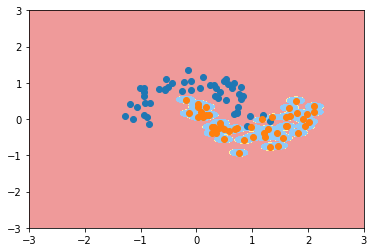

In [189]:
# plot the decision boundary 
plot_decision_bounary(RBFKernel_clf,axis = [-3,3,-3,3])
plt.scatter(X[y == 0,0], X[y == 0,1])
plt.scatter(X[y == 1,0], X[y == 1,1])
plt.show()

# gamma = 100 值越大，则钟形图越高瘦

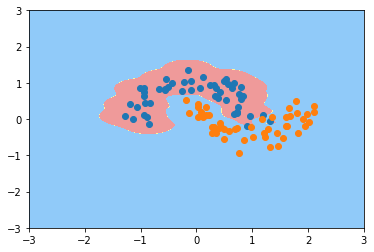

In [201]:
# gamma  = 10 
RBFKernel_clf = RBFKernelClassifier(gamma = 20)
RBFKernel_clf.fit(X,y)

 
# plot the decision boundary 
plot_decision_bounary(RBFKernel_clf,axis = [-3,3,-3,3])
plt.scatter(X[y == 0,0], X[y == 0,1])
plt.scatter(X[y == 1,0], X[y == 1,1])
plt.show()


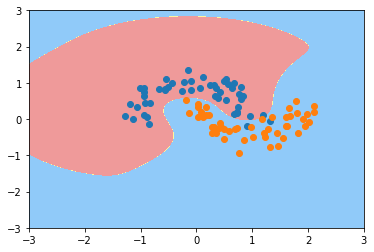

In [192]:
# gamma  = 1
RBFKernel_clf = RBFKernelClassifier(gamma = 1)
RBFKernel_clf.fit(X,y)

 
# plot the decision boundary 
plot_decision_bounary(RBFKernel_clf,axis = [-3,3,-3,3])
plt.scatter(X[y == 0,0], X[y == 0,1])
plt.scatter(X[y == 1,0], X[y == 1,1])
plt.show()


In [194]:
### gamma  = 0.1 钟型图越矮胖

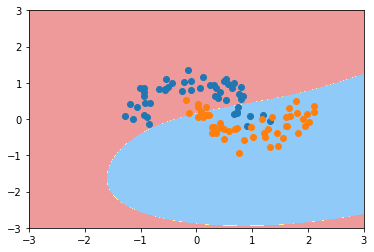

In [193]:
# gamma  = 0.1
RBFKernel_clf = RBFKernelClassifier(gamma = 0.100)
RBFKernel_clf.fit(X,y)

 
# plot the decision boundary 
plot_decision_bounary(RBFKernel_clf,axis = [-3,3,-3,3])
plt.scatter(X[y == 0,0], X[y == 0,1])
plt.scatter(X[y == 1,0], X[y == 1,1])
plt.show()
